<a href="https://colab.research.google.com/github/hilmizr/thesis-yolo/blob/main/V4_Tumor_Size_Estimation_YOLO11_%2B_Depth_Anything_3_%2B_SAM2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Dependencies (Colab)

In [1]:
!pip install -q --upgrade ultralytics roboflow gdown accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.5 MB/s eta 0:00:00


In [2]:
!pip install -q xformers gsplat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.7/915.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Install Depth Anything 3 from source
!git clone -q https://github.com/ByteDance-Seed/Depth-Anything-3
%cd Depth-Anything-3
!pip install -q -e .
%cd /content

/content/Depth-Anything-3
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.4/450.4 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.3/148.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.4/226.4 kB 20.7 MB/s eta 0:00:00
   

# Downloading Dataset from Roboflow

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="e3DAOLcZTZkR7VlO5jY2")
project = rf.workspace("pcithesis").project("mkthesis-v4-kfvrb")
version = project.version(3)
dataset = version.download("yolo11")

loading Roboflow workspace...
loading Roboflow project...

Version export complete for yolo11 format



Extracting Dataset Version Zip to mkthesis-v4-3 in yolo11:: 100%|██████████| 7243/7243 [00:00<00:00, 9337.17it/s] 


In [28]:
FILE_ID = "17TulZ7L8CCBXCoxk0Reqeq_nFg5ulinD"
!gdown --id {FILE_ID}

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17TulZ7L8CCBXCoxk0Reqeq_nFg5ulinD
To: /content/ground_truth_with_measurements_20260128_151704.csv
100% 34.2M/34.2M [00:00<00:00, 149MB/s]


# Downloading Model

In [5]:
FILE_ID = "1oBCw_ew5Nagxoczg2v2TuQ3jTnWipXlh"
OUTPUT = "model_files.zip"
!gdown --id {FILE_ID} -O {OUTPUT}
!unzip -q {OUTPUT} -d model_files

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1oBCw_ew5Nagxoczg2v2TuQ3jTnWipXlh
From (redirected): https://drive.google.com/uc?id=1oBCw_ew5Nagxoczg2v2TuQ3jTnWipXlh&confirm=t&uuid=e6bc3f65-22e5-4aa2-9d9d-843fbd5982e5
To: /content/model_files.zip
100% 37.3M/37.3M [00:00<00:00, 113MB/s]


# Import Libraries and Constants

In [ ]:
import os
print("Restarting runtime to apply updates...")
os.kill(os.getpid(), 9)

In [12]:
# ============================================================
# 3) Imports + constants
# ============================================================
import glob, hashlib
import cv2
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from PIL import Image
from depth_anything_3.api import DepthAnything3
import random

from ultralytics import YOLO, SAM

YOLO_WEIGHTS_PATH = "/content/model_files/best_yolo11n_MasKris_Thesis4_2025-11-08_04-17-55.pt"
TEST_IMAGES_PATH  = "/content/mkthesis-v4-3/test/images/"

CONF_THRES = 0.25
IOU_THRES  = 0.70
MAX_DET    = 300
IMG_SIZE   = 640

MASK_THRESH = 0.5
POLY_EPS    = 1.5

DEPTH_MODEL_ID = "depth-anything/da3mono-large"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Load Models

In [2]:
# ============================================================
# 4) Load models (once)
# ============================================================
yolo_model = YOLO(YOLO_WEIGHTS_PATH)
class_names = getattr(yolo_model, "names", None)

sam_model = SAM("sam2.1_b.pt")

depth_model = DepthAnything3.from_pretrained(DEPTH_MODEL_ID)
depth_model = depth_model.to(device=torch.device(DEVICE))
depth_model.eval()

config.json:   0%|          | 0.00/845 [00:00<?, ?B/s]

[INFO ] using MLP layer as FFN


model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

DepthAnything3(
  (model): DepthAnything3Net(
    (backbone): DinoV2(
      (pretrained): DinoVisionTransformer(
        (patch_embed): PatchEmbed(
          (proj): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14))
          (norm): Identity()
        )
        (blocks): ModuleList(
          (0-23): 24 x Block(
            (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
            (attn): Attention(
              (qkv): Linear(in_features=1024, out_features=3072, bias=True)
              (q_norm): Identity()
              (k_norm): Identity()
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=1024, out_features=1024, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
            )
            (ls1): LayerScale(1024, init_values=1.0, inplace=False)
            (drop_path1): Identity()
            (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
            (mlp): Mlp(
              (fc

# Utility Functions

In [3]:
# ============================================================
# 5) Minimal utilities
# ============================================================
def list_images(images_dir: str):
    exts = ("*.jpg", "*.jpeg", "*.png", "*.bmp", "*.webp")
    paths = []
    for ext in exts:
        paths.extend(glob.glob(os.path.join(images_dir, ext)))
    paths.sort()
    return paths

def _safe_class_name(class_id: int, names):
    if names is None:
        return None
    try:
        if isinstance(names, dict):
            return str(names.get(int(class_id), None))
        if isinstance(names, (list, tuple)):
            cid = int(class_id)
            return str(names[cid]) if 0 <= cid < len(names) else None
    except Exception:
        return None
    return None

def masks_to_numpy_bool(masks_obj, thresh=0.5):
    if masks_obj is None:
        return None
    data = getattr(masks_obj, "data", None)
    if data is None:
        data = getattr(masks_obj, "masks", None)
    if data is None:
        return None
    try:
        arr = data.detach().cpu().numpy()
    except Exception:
        arr = np.array(data)
    if arr.ndim == 2:
        arr = arr[None, :, :]
    return (arr > thresh)

def mask_centroid(mask_bool: np.ndarray):
    ys, xs = np.where(mask_bool)
    if xs.size == 0:
        return None, None
    return float(xs.mean()), float(ys.mean())

def mask_to_polygons(mask_bool: np.ndarray, simplify_eps=1.5):
    m = (mask_bool.astype(np.uint8) * 255)
    contours, _ = cv2.findContours(m, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    polys = []
    for cnt in contours:
        if cnt.shape[0] < 3:
            continue
        if simplify_eps and simplify_eps > 0:
            cnt = cv2.approxPolyDP(cnt, epsilon=simplify_eps, closed=True)
        pts = cnt.reshape(-1, 2).tolist()
        if len(pts) >= 3:
            polys.append(pts)
    return polys

def mask_to_rle(mask_bool: np.ndarray):
    h, w = mask_bool.shape
    flat = mask_bool.flatten(order="C").astype(np.uint8)

    counts = []
    last = 0
    run = 0
    for v in flat:
        if v == last:
            run += 1
        else:
            counts.append(run)
            run = 1
            last = v
    counts.append(run)
    return {"size": [h, w], "counts": counts}

def infer_depth_map_np(image_path: str):
    img_pil = Image.open(image_path).convert("RGB")
    w, h = img_pil.size

    with torch.no_grad():
        pred = depth_model.inference([img_pil])

    # depth is required
    depth_raw = np.array(pred.depth[0], dtype=np.float32)

    # Align depth to original image size for mask indexing
    if depth_raw.shape != (h, w):
        depth_raw = cv2.resize(depth_raw, (w, h), interpolation=cv2.INTER_CUBIC)

    depth_raw = np.nan_to_num(depth_raw, nan=0.0, posinf=0.0, neginf=0.0)

    dmin, dmax = float(depth_raw.min()), float(depth_raw.max())
    depth_norm = (depth_raw - dmin) / (dmax - dmin + 1e-6)

    # conf is optional
    conf = None
    if hasattr(pred, "conf") and pred.conf is not None:
        conf = np.array(pred.conf[0], dtype=np.float32)
        if conf.shape != (h, w):
            conf = cv2.resize(conf, (w, h), interpolation=cv2.INTER_CUBIC)
        conf = np.nan_to_num(conf, nan=0.0, posinf=0.0, neginf=0.0)

    return depth_raw, depth_norm, conf

# Core Function

In [5]:
# ============================================================
# 6) Core function: OPTIMIZED Single-Read Pipeline
# ============================================================
def estimate_tumor_sizes_for_image(
    img_path: str,
    yolo_model,
    sam_model,
    depth_model,
    class_names=None,
    conf_thres=0.25,
    iou_thres=0.70,
    max_det=300,
    imgsz=640,
    mask_thresh=0.5,
    polygon_simplify_eps=1.5,
    dk_mode="median_raw",
    store_polygons=True,
    store_rle=True,
    depth_conf_thresh=0.75,
    return_debug=False,
):
    """
    Optimized pipeline:
      - Reads image ONCE.
      - Uses RAW depth values (avoids normalization trap).
      - Skips empty masks (robustness).
    """
    image_name = os.path.basename(img_path)

    # ---------------------------------------------------------
    # A) SINGLE IO READ
    # ---------------------------------------------------------
    # Read BGR for OpenCV/YOLO
    img_cv2 = cv2.imread(img_path)
    if img_cv2 is None:
        empty = pd.DataFrame()
        meta = {"image": image_name, "error": "file_not_found_or_corrupt"}
        return (empty, meta, None) if return_debug else (empty, meta)

    # Create RGB copy for SAM / Depth Anything
    img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
    h, w = img_cv2.shape[:2]

    # ---------------------------------------------------------
    # B) YOLO DETECTION
    # ---------------------------------------------------------
    yolo_res = yolo_model.predict(
        img_cv2, conf=conf_thres, iou=iou_thres, max_det=max_det, imgsz=imgsz, verbose=False
    )[0]

    num_det = int(yolo_res.boxes.shape[0]) if yolo_res.boxes is not None else 0

    # Initialize empty return if no detections
    if num_det == 0:
        empty = pd.DataFrame()
        meta = {"image": image_name, "num_det": 0, "num_masks": 0, "d_ref": None}
        debug = {"img_rgb": img_rgb, "depth_raw": None, "masks_bool": None, "conf_raw": None}
        return (empty, meta, debug) if return_debug else (empty, meta)

    # ---------------------------------------------------------
    # C) SAM SEGMENTATION
    # ---------------------------------------------------------

    # Pass RGB image + YOLO bboxes directly
    bboxes_xyxy = yolo_res.boxes.xyxy.cpu().tolist()
    sam_res = sam_model(img_rgb, bboxes=bboxes_xyxy, verbose=False)[0]

    masks_bool = masks_to_numpy_bool(sam_res.masks, thresh=mask_thresh) if (sam_res and sam_res.masks is not None) else None
    if masks_bool is None or masks_bool.shape[0] == 0:
        empty = pd.DataFrame()
        meta = {"image": image_name, "num_det": num_det, "num_masks": 0, "d_ref": None}
        debug = {"img_rgb": img_rgb, "depth_raw": None, "masks_bool": masks_bool, "conf_raw": None}
        return (empty, meta, debug) if return_debug else (empty, meta)


    # ---------------------------------------------------------
    # D) DEPTH ANYTHING (UPDATED: Extract Confidence)
    # ---------------------------------------------------------
    with torch.no_grad():
        da3_pred = depth_model.inference([img_rgb])

    depth_raw = np.array(da3_pred.depth[0], dtype=np.float32)
    if depth_raw.shape != (h, w):
        depth_raw = cv2.resize(depth_raw, (w, h), interpolation=cv2.INTER_CUBIC)
    depth_raw = np.nan_to_num(depth_raw, nan=0.0)

    # 2. Confidence Map
    conf_raw = None
    # Check if model output has 'conf' attribute (DA3 usually does)
    if hasattr(da3_pred, "conf") and da3_pred.conf is not None:
        conf_raw = np.array(da3_pred.conf[0], dtype=np.float32)

        # Vital: Resize to match image exactly like depth map
        if conf_raw.shape != (h, w):
            conf_raw = cv2.resize(conf_raw, (w, h), interpolation=cv2.INTER_NEAREST)

        conf_raw = np.nan_to_num(conf_raw, nan=0.0)

    # ---------------------------------------------------------
    # E) PREPARE DATA LOOPS (UPDATED: Apply Filter)
    # ---------------------------------------------------------
    boxes = yolo_res.boxes
    xyxy = boxes.xyxy.cpu().numpy()
    confs = boxes.conf.cpu().numpy() if boxes.conf is not None else None
    clss  = boxes.cls.cpu().numpy()  if boxes.cls  is not None else None

    n_masks = int(masks_bool.shape[0])
    raw_rows = []
    valid_dk_values = []

    for i in range(n_masks):
        m = masks_bool[i]
        area_px = int(m.sum())
        if area_px < 10: continue

        # Get raw depth values for this mask
        vals = depth_raw[m]

        # --- NEW: CONFIDENCE FILTERING ---
        if conf_raw is not None and depth_conf_thresh > 0:
            c_vals = conf_raw[m]

            # Find pixels where confidence is high enough
            high_conf_mask = c_vals >= depth_conf_thresh

            # Safety Check: If filtering removes almost ALL pixels (e.g., blurry area),
            # fallback to using the original noisy data instead of crashing/skipping.
            if high_conf_mask.sum() > 5:
                vals = vals[high_conf_mask]
            # else: keep 'vals' as is (better noisy data than no data)
        # ---------------------------------

        mean_r = float(vals.mean())
        med_r  = float(np.median(vals))

        d_k = mean_r if dk_mode == "mean_raw" else med_r
        valid_dk_values.append(d_k)

        # Store partial data to avoid re-looping
        raw_rows.append({
            "idx": i,
            "mask": m,
            "area_px": area_px,
            "d_k": d_k,
            "depth_mean": mean_r,
            "depth_median": med_r,
            "bbox": xyxy[i].tolist() if i < len(xyxy) else None,
            "conf": float(confs[i]) if confs is not None and i < len(confs) else None,
            "cls": int(clss[i]) if clss is not None and i < len(clss) else None
        })

    # ---------------------------------------------------------
    # F) CALCULATE REF DEPTH & CORRECT AREAS
    # ---------------------------------------------------------
    # In Disparity/Inverse Depth: Higher Value = Closer
    # We usually want d_ref to be the "closest" point (max disparity)
    if valid_dk_values:
        d_ref = max(valid_dk_values)
    else:
        d_ref = None

    final_rows = []

    for row in raw_rows:
        i = row["idx"]
        m = row["mask"]
        d_k = row["d_k"]

        # Calculate Corrected Area (Inverse Square of Inverse Depth)
        # Factor = (d_ref / d_k)^2
        if d_ref and d_k > 1e-9:
            correction_factor = (d_ref / d_k) ** 2
            area_corrected = float(row["area_px"]) * correction_factor
        else:
            area_corrected = None

        # Metadata generation
        cx, cy = mask_centroid(m)
        y_name = _safe_class_name(row["cls"], class_names)

        base_hash = (
            f"{image_name}|idx={i}|bbox={row['bbox']}|area={row['area_px']}"
            f"|cx={0.0 if cx is None else cx:.2f}|cy={0.0 if cy is None else cy:.2f}"
        )
        tumor_uid = hashlib.sha1(base_hash.encode("utf-8")).hexdigest()[:16]

        final_rows.append({
            "image": image_name,
            "tumor_id": f"T{i+1}",
            "tumor_uid": tumor_uid,

            "area_pixels": row["area_px"],
            "area_corrected": area_corrected,

            "d_k_used": d_k,
            "d_ref": d_ref,
            "dk_mode": dk_mode,

            "depth_mean": row["depth_mean"],
            "depth_median": row["depth_median"],

            "centroid_x": cx,
            "centroid_y": cy,

            "yolo_bbox_xyxy": row["bbox"],
            "yolo_conf": row["conf"],
            "yolo_class_id": row["cls"],
            "yolo_class_name": y_name,

            "mask_polygons": mask_to_polygons(m, simplify_eps=polygon_simplify_eps) if store_polygons else None,
            "mask_rle": mask_to_rle(m) if store_rle else None,
        })

    df_img = pd.DataFrame(final_rows)

    meta = {
        "image": image_name,
        "num_det": num_det,
        "num_masks": len(final_rows),
        "d_ref": d_ref,
        "dk_mode": dk_mode,
        "conf_thres": conf_thres,
        "iou_thres": iou_thres,
        "imgsz": imgsz,
        "mask_thresh": mask_thresh,
    }

    debug = {
        "img_rgb": img_rgb,
        "depth_raw": depth_raw,
        "conf_raw": conf_raw,
        "masks_bool": masks_bool,
        "bboxes_xyxy": bboxes_xyxy,
        "image_name": image_name,
    }

    return (df_img, meta, debug) if return_debug else (df_img, meta)

# Test on Sample Image

In [6]:
import os
all_test_images = list_images(TEST_IMAGES_PATH)
img_path = all_test_images[0]
df_img, meta = estimate_tumor_sizes_for_image(
    img_path=img_path,
    yolo_model=yolo_model,
    sam_model=sam_model,
    depth_model=depth_model,
    class_names=class_names,
    conf_thres=CONF_THRES,
    iou_thres=IOU_THRES,
    max_det=MAX_DET,
    imgsz=IMG_SIZE,
    mask_thresh=MASK_THRESH,
    polygon_simplify_eps=POLY_EPS,
    dk_mode="median_raw",
    store_polygons=True,
    store_rle=True,
)
print("Meta:", meta)
print("Preview:", df_img.head(2) if not df_img.empty else "No tumors found")

[INFO ] Processed Images Done taking 0.016190528869628906 seconds. Shape:  torch.Size([1, 3, 504, 504])
[INFO ] Model Forward Pass Done. Time: 0.39167308807373047 seconds
[INFO ] Conversion to Prediction Done. Time: 0.002321004867553711 seconds
Meta: {'image': '00000006_jpg.rf.5efbcd8e1db7b4dc2d7f496729cc1887.jpg', 'num_det': 2, 'num_masks': 2, 'd_ref': 0.636326253414154, 'dk_mode': 'median_raw', 'conf_thres': 0.25, 'iou_thres': 0.7, 'imgsz': 640, 'mask_thresh': 0.5}
Preview:                                                image tumor_id  \
0  00000006_jpg.rf.5efbcd8e1db7b4dc2d7f496729cc18...       T1   
1  00000006_jpg.rf.5efbcd8e1db7b4dc2d7f496729cc18...       T2   

          tumor_uid  area_pixels  area_corrected  d_k_used     d_ref  \
0  a938fdec78f4ebbf         2813     2894.686285  0.627284  0.636326   
1  94727691c2992963          617      617.000000  0.636326  0.636326   

      dk_mode  depth_mean  depth_median  centroid_x  centroid_y  \
0  median_raw    0.625970      0.627284

In [7]:
df_img

image tumor_id  \
0  00000006_jpg.rf.5efbcd8e1db7b4dc2d7f496729cc18...       T1   
1  00000006_jpg.rf.5efbcd8e1db7b4dc2d7f496729cc18...       T2   

          tumor_uid  area_pixels  area_corrected  d_k_used     d_ref  \
0  a938fdec78f4ebbf         2813     2894.686285  0.627284  0.636326   
1  94727691c2992963          617      617.000000  0.636326  0.636326   

      dk_mode  depth_mean  depth_median  centroid_x  centroid_y  \
0  median_raw    0.625970      0.627284  328.284038  248.862424   
1  median_raw    0.630627      0.636326   10.090762   81.265802   

                                      yolo_bbox_xyxy  yolo_conf  \
0  [292.8720703125, 184.9866943359375, 360.825195...   0.762301   
1  [0.060268402099609375, 63.65228271484375, 27.8...   0.689953   

   yolo_class_id yolo_class_name  \
0              0              PC   
1              0              PC   

                                       mask_polygons  \
0  [[[298, 196], [294, 200], [293, 206], [298, 22...   
1  [[[24, 68], [4, 68], [0, 70], [0, 99], [8, 98]...   

                                            mask_rle  
0  {'size': [640, 640], 'counts': [125738, 1, 638...  
1  {'size': [640, 640], 'counts': [43524, 21, 616...

In [8]:
meta

{'image': '00000006_jpg.rf.5efbcd8e1db7b4dc2d7f496729cc1887.jpg',
 'num_det': 2,
 'num_masks': 2,
 'd_ref': 0.636326253414154,
 'dk_mode': 'median_raw',
 'conf_thres': 0.25,
 'iou_thres': 0.7,
 'imgsz': 640,
 'mask_thresh': 0.5}

In [9]:
df_img

image tumor_id  \
0  00000006_jpg.rf.5efbcd8e1db7b4dc2d7f496729cc18...       T1   
1  00000006_jpg.rf.5efbcd8e1db7b4dc2d7f496729cc18...       T2   

          tumor_uid  area_pixels  area_corrected  d_k_used     d_ref  \
0  a938fdec78f4ebbf         2813     2894.686285  0.627284  0.636326   
1  94727691c2992963          617      617.000000  0.636326  0.636326   

      dk_mode  depth_mean  depth_median  centroid_x  centroid_y  \
0  median_raw    0.625970      0.627284  328.284038  248.862424   
1  median_raw    0.630627      0.636326   10.090762   81.265802   

                                      yolo_bbox_xyxy  yolo_conf  \
0  [292.8720703125, 184.9866943359375, 360.825195...   0.762301   
1  [0.060268402099609375, 63.65228271484375, 27.8...   0.689953   

   yolo_class_id yolo_class_name  \
0              0              PC   
1              0              PC   

                                       mask_polygons  \
0  [[[298, 196], [294, 200], [293, 206], [298, 22...   
1  [[[24, 68], [4, 68], [0, 70], [0, 99], [8, 98]...   

                                            mask_rle  
0  {'size': [640, 640], 'counts': [125738, 1, 638...  
1  {'size': [640, 640], 'counts': [43524, 21, 616...

# To JSONable

In [10]:
"""# To JSONable"""

def _to_jsonable(x):
    """
    Convert common non-JSON-safe types to JSON-safe Python types.
    Handles: numpy scalars, numpy arrays, NaN, inf, tuples, lists, dicts.
    """
    if x is None:
        return None

    # numpy scalar -> python scalar
    if isinstance(x, (np.generic,)):
        x = x.item()

    # NaN/inf -> None
    if isinstance(x, float):
        if math.isnan(x) or math.isinf(x):
            return None

    # numpy array -> list
    if isinstance(x, np.ndarray):
        return [_to_jsonable(v) for v in x.tolist()]

    # tuple/list -> list
    if isinstance(x, (tuple, list)):
        return [_to_jsonable(v) for v in x]

    # dict -> dict
    if isinstance(x, dict):
        return {str(k): _to_jsonable(v) for k, v in x.items()}

    # other types (int, str, bool, float already ok)
    return x


def df_to_json_ready(df: pd.DataFrame):
    """
    Convert tumor DataFrame into JSON-ready list of dicts.
    Ensures NaN becomes None, numpy types become python types.
    """
    if df is None or df.empty:
        return []

    records = df.to_dict(orient="records")
    return [{k: _to_jsonable(v) for k, v in rec.items()} for rec in records]


def estimate_tumor_sizes_json(
    img_path: str,
    yolo_model,
    sam_model,
    depth_model,
    class_names=None,
    conf_thres=0.25,
    iou_thres=0.70,
    max_det=300,
    imgsz=640,
    mask_thresh=0.5,
    polygon_simplify_eps=1.5,
    dk_mode="median_raw",
    store_polygons=False,
    store_rle=False,
):
    """
    JSON-ready API output for 1 image:
      {
        "meta": {...},
        "tumors": [ {...}, {...}, ... ]
      }
    """
    df_img, meta = estimate_tumor_sizes_for_image(
        img_path=img_path,
        yolo_model=yolo_model,
        sam_model=sam_model,
        depth_model=depth_model, # Pass it through
        class_names=class_names,
        conf_thres=conf_thres,
        iou_thres=iou_thres,
        max_det=max_det,
        imgsz=imgsz,
        mask_thresh=mask_thresh,
        polygon_simplify_eps=polygon_simplify_eps,
        dk_mode=dk_mode,
        store_polygons=store_polygons,
        store_rle=store_rle,
    )

    payload = {
        "meta": _to_jsonable(meta),
        "tumors": df_to_json_ready(df_img),
    }
    return payload

In [54]:
# Test the JSON function
payload = estimate_tumor_sizes_json(
    img_path=all_test_images[0],
    yolo_model=yolo_model,
    sam_model=sam_model,
    depth_model=depth_model,
    class_names=class_names,
    conf_thres=CONF_THRES,
    iou_thres=IOU_THRES,
    max_det=MAX_DET,
    imgsz=IMG_SIZE,
    dk_mode="median_raw",
    store_polygons=False,
    store_rle=False,
)

print(payload["meta"])
if payload["tumors"]:
    print(payload["tumors"][:2])
else:
    print("No tumors found.")

[INFO ] Processed Images Done taking 0.011807441711425781 seconds. Shape:  torch.Size([1, 3, 504, 504])
[INFO ] Model Forward Pass Done. Time: 0.05878710746765137 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0010187625885009766 seconds
{'image': '00000006_jpg.rf.5efbcd8e1db7b4dc2d7f496729cc1887.jpg', 'num_det': 2, 'num_masks': 2, 'd_ref': 0.636326253414154, 'dk_mode': 'median_raw', 'conf_thres': 0.25, 'iou_thres': 0.7, 'imgsz': 640, 'mask_thresh': 0.5}
[{'image': '00000006_jpg.rf.5efbcd8e1db7b4dc2d7f496729cc1887.jpg', 'tumor_id': 'T1', 'tumor_uid': 'a938fdec78f4ebbf', 'area_pixels': 2813, 'area_corrected': 2894.6862854568394, 'd_k_used': 0.6272836327552795, 'd_ref': 0.636326253414154, 'dk_mode': 'median_raw', 'depth_mean': 0.6259704828262329, 'depth_median': 0.6272836327552795, 'centroid_x': 328.28403839317457, 'centroid_y': 248.86242445787417, 'yolo_bbox_xyxy': [292.8720703125, 184.9866943359375, 360.8251953125, 298.139892578125], 'yolo_conf': 0.7623010873794556, 'yolo_class

# Map and Classify to Categories

In [55]:
GT_PATH = "ground_truth_with_measurements_20260128_151704.csv"
df = pd.read_csv(GT_PATH)

In [56]:
def compute_option1_thresholds(gt_path=GT_PATH, metric="Measured_Area_Corrected"):
    df_gt = pd.read_csv(gt_path)
    df_gt["Size_merged"] = df_gt["Size"].replace({"+5cm et confluent": "+5cm"})
    df_gt = df_gt.dropna(subset=["Size_merged", metric]).copy()

    def q1(x): return x.quantile(0.25)
    def q3(x): return x.quantile(0.75)

    stats = (
        df_gt.groupby("Size_merged")[metric]
        .agg([q1, q3])
        .rename(columns={"q1": "Q1", "q3": "Q3"})
        .reindex(["0-5mm", "5mm-5cm", "+5cm"])
    )

    t1 = float((stats.loc["0-5mm", "Q3"] + stats.loc["5mm-5cm", "Q1"]) / 2)
    t2 = float((stats.loc["5mm-5cm", "Q3"] + stats.loc["+5cm", "Q1"]) / 2)
    return t1, t2, stats

In [57]:
t1, t2, stats_q = compute_option1_thresholds()
print("t1:", t1)
print("t2:", t2)
display(stats_q)

t1: 1022.8520888725178
t2: 10172.258652057724


Q1             Q3
Size_merged                             
0-5mm          153.311589    1371.779109
5mm-5cm        673.925069    9198.261264
+5cm         11146.256040  128166.830350

In [58]:
def classify_size_from_area_corrected(area_corrected, t1, t2):
    if area_corrected is None or (isinstance(area_corrected, float) and np.isnan(area_corrected)):
        return None
    if area_corrected <= t1:
        return "0-5mm"
    elif area_corrected <= t2:
        return "5mm-5cm"
    else:
        return "+5cm"

In [72]:
df_img["size_category"] = df_img["area_corrected"].apply(
    lambda v: classify_size_from_area_corrected(v, t1, t2)
)
display(df_img[["tumor_id", "area_corrected", "size_category"]].head(10))

tumor_id  area_corrected size_category
0       T1     2894.686285       5mm-5cm
1       T2      617.000000         0-5mm

# Visualization

In [69]:
def _depth_to_heatmap_rgb(depth_raw: np.ndarray):
    """Normalize depth only for visualization and convert to inferno heatmap RGB."""
    d = depth_raw.astype(np.float32)
    dmin, dmax = float(np.min(d)), float(np.max(d))
    dnorm = (d - dmin) / (dmax - dmin + 1e-6)
    vis = (dnorm * 255).astype(np.uint8)
    hm_bgr = cv2.applyColorMap(vis, cv2.COLORMAP_INFERNO)
    hm_rgb = cv2.cvtColor(hm_bgr, cv2.COLOR_BGR2RGB)
    return hm_rgb

def _draw_outlined_text(img_rgb, text, x, y, font_scale=0.6, thickness=2):
    font = cv2.FONT_HERSHEY_SIMPLEX
    x = int(max(0, x))
    y = int(max(0, y))
    cv2.putText(img_rgb, text, (x, y), font, font_scale, (0, 0, 0), thickness + 2)
    cv2.putText(img_rgb, text, (x, y), font, font_scale, (255, 255, 255), thickness)

def visualize_result(img_path, df_img, debug, show_max=50):
    """
    Shows:
      1) Original image
      2) DA3 depth heatmap
      3) Overlay masks with labels (class, corrected area)
    """
    if debug is None or debug.get("img_rgb") is None:
        print("No debug info available. Run estimate_tumor_sizes_for_image(..., return_debug=True).")
        return

    img_rgb = debug["img_rgb"].copy()
    depth_raw = debug.get("depth_raw", None)
    masks_bool = debug.get("masks_bool", None)

    if depth_raw is None:
        print("No depth map in debug bundle.")
        return

    depth_heatmap = _depth_to_heatmap_rgb(depth_raw)

    # Annotated overlay
    annotated = img_rgb.copy()

    if df_img is not None and not df_img.empty and masks_bool is not None:
        # Sort by corrected area if present, else by pixel area, then limit
        work = df_img.copy()
        if "area_corrected" in work.columns:
            work["_sort"] = work["area_corrected"].fillna(-1)
        else:
            work["_sort"] = work["area_pixels"].fillna(-1)

        work = work.sort_values("_sort", ascending=False).head(show_max)

        h, w = annotated.shape[:2]
        scale = 0.6 if w < 1000 else 1.0
        thickness = 2
        y_off = 15 if w < 1000 else 25

        for _, row in work.iterrows():
            # Tumor index from tumor_id like "T3"
            tid = str(row.get("tumor_id", "T1"))
            try:
                idx0 = int(tid.replace("T", "")) - 1
            except Exception:
                idx0 = None

            if idx0 is None or idx0 < 0 or idx0 >= masks_bool.shape[0]:
                continue

            m = masks_bool[idx0]
            if m is None or m.sum() == 0:
                continue

            mask_u8 = (m.astype(np.uint8) * 255)
            contours, _ = cv2.findContours(mask_u8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            if not contours:
                continue

            # Fill with alpha overlay
            overlay = annotated.copy()
            cv2.drawContours(overlay, contours, -1, (0, 255, 0), -1)
            annotated = cv2.addWeighted(overlay, 0.4, annotated, 0.6, 0.0)

            # Outline
            cv2.drawContours(annotated, contours, -1, (0, 255, 0), 2)

            cx = row.get("centroid_x", None)
            cy = row.get("centroid_y", None)
            if cx is None or cy is None or (isinstance(cx, float) and math.isnan(cx)):
                # fallback centroid from first contour moments
                M = cv2.moments(contours[0])
                if M["m00"] != 0:
                    cx = M["m10"] / M["m00"]
                    cy = M["m01"] / M["m00"]
                else:
                    cx, cy = 0, 0

            cls_name = row.get("yolo_class_name", None)
            cls_id = row.get("yolo_class_id", None)
            conf = row.get("yolo_conf", None)
            area_corr = row.get("area_corrected", None)

            size_cat = row.get("Size_Pred_Option1", None)
            if size_cat in (None, "None") or (isinstance(size_cat, float) and math.isnan(size_cat)):
                line2 = "Cat: N/A"
            else:
                line2 = f"Cat: {size_cat}"

            if area_corr is None or (isinstance(area_corr, float) and math.isnan(area_corr)):
                line3 = "Area: N/A"
            else:
                line3 = f"Area: {int(area_corr)} px"


            line1 = f"{tid}"
            if cls_name not in (None, "None"):
                line1 += f" | {cls_name}"
            elif cls_id is not None:
                line1 += f" | cls {int(cls_id)}"
            if conf is not None and not (isinstance(conf, float) and math.isnan(conf)):
                line1 += f" | {conf:.2f}"


            _draw_outlined_text(annotated, line1, cx - 40, cy - y_off, font_scale=scale, thickness=thickness)
            _draw_outlined_text(annotated, line2, cx - 40, cy,        font_scale=scale, thickness=thickness)
            _draw_outlined_text(annotated, line3, cx - 40, cy + y_off, font_scale=scale, thickness=thickness)


    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))

    axes[0].imshow(img_rgb)
    axes[0].set_title("Original")
    axes[0].axis("off")

    axes[1].imshow(depth_heatmap)
    axes[1].set_title("Depth Anything 3 (Inferno)")
    axes[1].axis("off")

    axes[2].imshow(annotated)
    axes[2].set_title(f"CODE 1: Tumors | Cat by area_corrected (t1={t1:.0f}, t2={t2:.0f})")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

In [66]:
def run_and_visualize(img_path):
    df_img, meta, debug = estimate_tumor_sizes_for_image(
        img_path=img_path,
        yolo_model=yolo_model,
        sam_model=sam_model,
        depth_model=depth_model,
        class_names=class_names,
        conf_thres=CONF_THRES,
        iou_thres=IOU_THRES,
        max_det=MAX_DET,
        imgsz=IMG_SIZE,
        mask_thresh=MASK_THRESH,
        polygon_simplify_eps=POLY_EPS,
        dk_mode="median_raw",
        store_polygons=True,
        store_rle=True,
        depth_conf_thresh=0.75,
        return_debug=True,
    )

    # Add predicted size category
    if df_img is not None and not df_img.empty:
        df_img["Size_Pred_Option1"] = df_img["area_corrected"].apply(
            lambda v: classify_size_from_area_corrected(v, t1, t2)
        )

    print("Meta:", meta)
    if df_img is not None and not df_img.empty:
        display(df_img.head(10))
    else:
        print("No tumors found.")

    visualize_result(img_path, df_img, debug)
    return df_img, meta, debug

In [67]:
def visualize_multiple_samples(n_samples, images_dir):
    paths = list_images(images_dir)
    if not paths:
        print("No images found.")
        return

    n = min(n_samples, len(paths))
    chosen = random.sample(paths, n)

    for i, p in enumerate(chosen, start=1):
        print(f"\nSample {i} of {n}: {os.path.basename(p)}")
        run_and_visualize(p)


Sample 1 of 5: 00000119_jpg.rf.0274d16789647c630272ae20c712430c.jpg
[INFO ] Processed Images Done taking 0.012138128280639648 seconds. Shape:  torch.Size([1, 3, 504, 504])
[INFO ] Model Forward Pass Done. Time: 0.05899858474731445 seconds
[INFO ] Conversion to Prediction Done. Time: 0.001275777816772461 seconds
Meta: {'image': '00000119_jpg.rf.0274d16789647c630272ae20c712430c.jpg', 'num_det': 1, 'num_masks': 1, 'd_ref': 0.8366897106170654, 'dk_mode': 'median_raw', 'conf_thres': 0.25, 'iou_thres': 0.7, 'imgsz': 640, 'mask_thresh': 0.5}


image tumor_id  \
0  00000119_jpg.rf.0274d16789647c630272ae20c71243...       T1   

          tumor_uid  area_pixels  area_corrected  d_k_used    d_ref  \
0  acef73955109a77d         9422          9422.0   0.83669  0.83669   

      dk_mode  depth_mean  depth_median  centroid_x  centroid_y  \
0  median_raw    0.837359       0.83669   93.544152  121.582042   

                                      yolo_bbox_xyxy  yolo_conf  \
0  [23.385498046875, 53.275787353515625, 155.5228...   0.780054   

   yolo_class_id yolo_class_name  \
0              0              PC   

                                       mask_polygons  \
0  [[[151, 46], [107, 53], [67, 63], [58, 63], [4...   

                                            mask_rle Size_Pred_Option1  
0  {'size': [640, 640], 'counts': [29591, 1, 630,...           5mm-5cm

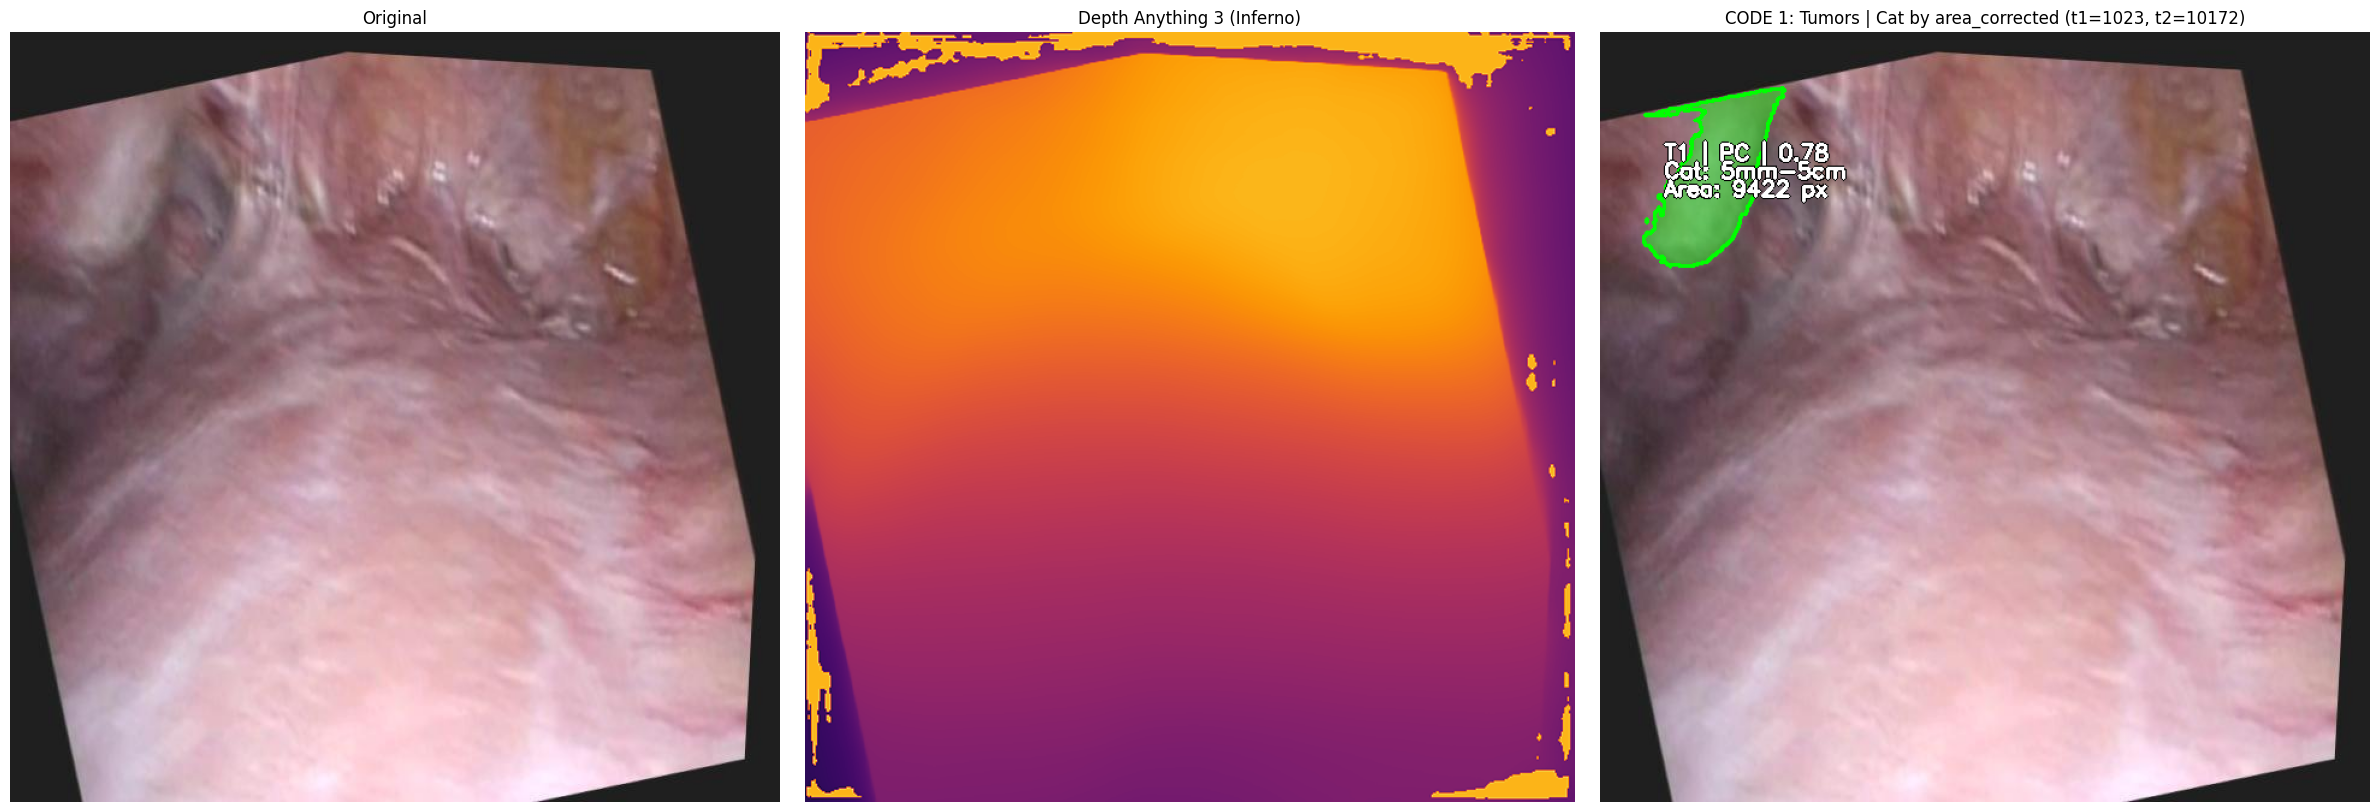


Sample 2 of 5: 00000292_jpg.rf.a06c9f0e28a38eef4ef8e2a8ec26ad67.jpg
[INFO ] Processed Images Done taking 0.012102842330932617 seconds. Shape:  torch.Size([1, 3, 504, 504])
[INFO ] Model Forward Pass Done. Time: 0.05805230140686035 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012135505676269531 seconds
Meta: {'image': '00000292_jpg.rf.a06c9f0e28a38eef4ef8e2a8ec26ad67.jpg', 'num_det': 1, 'num_masks': 1, 'd_ref': 0.7659894227981567, 'dk_mode': 'median_raw', 'conf_thres': 0.25, 'iou_thres': 0.7, 'imgsz': 640, 'mask_thresh': 0.5}


image tumor_id  \
0  00000292_jpg.rf.a06c9f0e28a38eef4ef8e2a8ec26ad...       T1   

          tumor_uid  area_pixels  area_corrected  d_k_used     d_ref  \
0  264190858e11210c          586           586.0  0.765989  0.765989   

      dk_mode  depth_mean  depth_median  centroid_x  centroid_y  \
0  median_raw    0.763884      0.765989   530.25256  286.904437   

                                      yolo_bbox_xyxy  yolo_conf  \
0  [519.1103515625, 267.0726318359375, 541.832275...   0.801391   

   yolo_class_id yolo_class_name  \
0              0              PC   

                                       mask_polygons  \
0  [[[533, 270], [528, 271], [519, 284], [522, 29...   

                                            mask_rle Size_Pred_Option1  
0  {'size': [640, 640], 'counts': [173330, 4, 634...             0-5mm

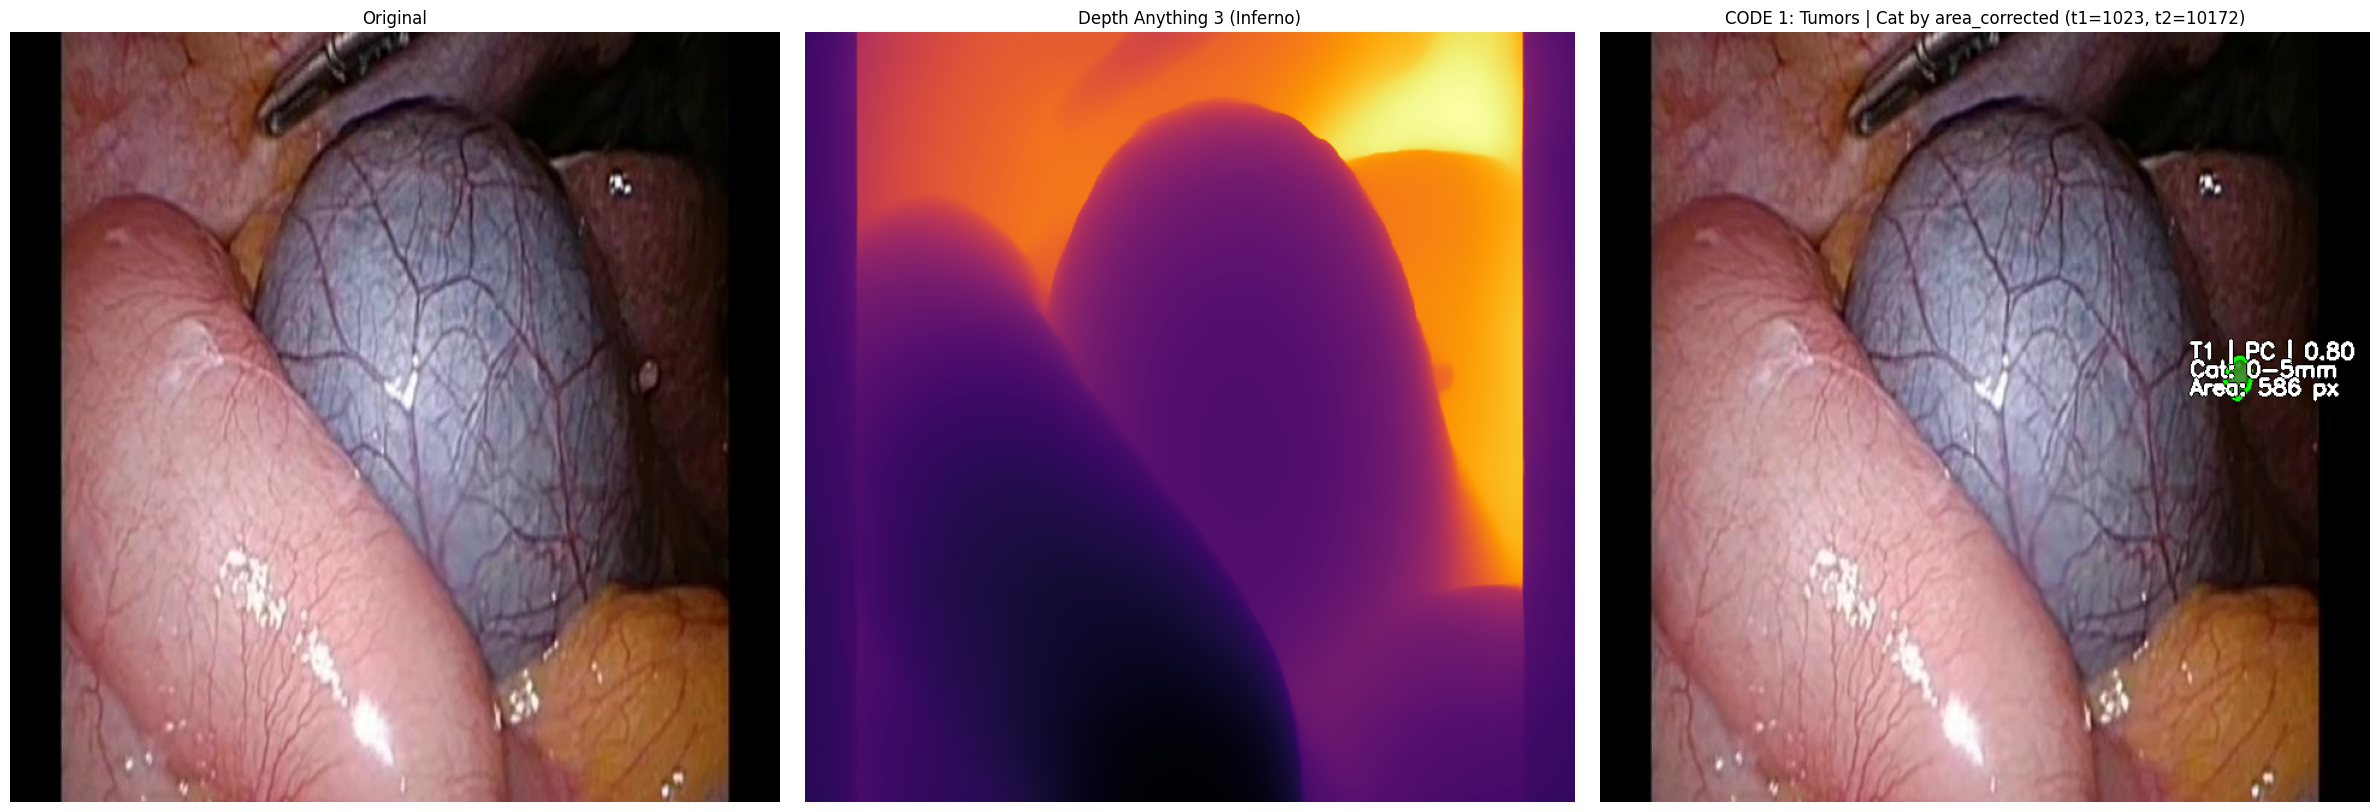


Sample 3 of 5: 00000679_jpg.rf.2e955d48b664ed366d65df7dc56292b9.jpg
[INFO ] Processed Images Done taking 0.011443138122558594 seconds. Shape:  torch.Size([1, 3, 504, 504])
[INFO ] Model Forward Pass Done. Time: 0.059139251708984375 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012919902801513672 seconds
Meta: {'image': '00000679_jpg.rf.2e955d48b664ed366d65df7dc56292b9.jpg', 'num_det': 12, 'num_masks': 12, 'd_ref': 0.7669799327850342, 'dk_mode': 'median_raw', 'conf_thres': 0.25, 'iou_thres': 0.7, 'imgsz': 640, 'mask_thresh': 0.5}


image tumor_id  \
0  00000679_jpg.rf.2e955d48b664ed366d65df7dc56292...       T1   
1  00000679_jpg.rf.2e955d48b664ed366d65df7dc56292...       T2   
2  00000679_jpg.rf.2e955d48b664ed366d65df7dc56292...       T3   
3  00000679_jpg.rf.2e955d48b664ed366d65df7dc56292...       T4   
4  00000679_jpg.rf.2e955d48b664ed366d65df7dc56292...       T5   
5  00000679_jpg.rf.2e955d48b664ed366d65df7dc56292...       T6   
6  00000679_jpg.rf.2e955d48b664ed366d65df7dc56292...       T7   
7  00000679_jpg.rf.2e955d48b664ed366d65df7dc56292...       T8   
8  00000679_jpg.rf.2e955d48b664ed366d65df7dc56292...       T9   
9  00000679_jpg.rf.2e955d48b664ed366d65df7dc56292...      T10   

          tumor_uid  area_pixels  area_corrected  d_k_used    d_ref  \
0  4361b7eedae385b7        27330    32235.297045  0.706217  0.76698   
1  614e2a1371f4c365         9641    17929.040591  0.562427  0.76698   
2  ee17d5443bf11926         2281     3217.242714  0.645810  0.76698   
3  a61f43480077a5a1         5669    10846.440955  0.554490  0.76698   
4  8a0ac62f40756c9a         1351     1351.000000  0.766980  0.76698   
5  e7115d1b202d9e1a         2111     2747.344346  0.672313  0.76698   
6  23a5ab890b47d3af         1451     1711.377227  0.706228  0.76698   
7  63a6913d31b5b78e         2474     3080.123249  0.687385  0.76698   
8  18c8c0ea27781115         1265     1394.092109  0.730606  0.76698   
9  ee5efff560023573         1384     1769.977206  0.678216  0.76698   

      dk_mode  depth_mean  depth_median  centroid_x  centroid_y  \
0  median_raw    0.707879      0.706217  237.629016  207.696963   
1  median_raw    0.559795      0.562427  523.924593  374.596204   
2  median_raw    0.646217      0.645810  386.536168  290.453748   
3  median_raw    0.549894      0.554490  526.893808  299.659728   
4  median_raw    0.766749      0.766980  251.323464  367.194671   
5  median_raw    0.671800      0.672313  379.634770  356.630507   
6  median_raw    0.706395      0.706228  343.123363  391.604411   
7  median_raw    0.688137      0.687385  379.310428  431.062652   
8  median_raw    0.730838      0.730606  303.845850  374.580237   
9  median_raw    0.678065      0.678216  389.727601  421.296243   

                                      yolo_bbox_xyxy  yolo_conf  \
0  [148.43798828125, 102.86531829833984, 311.1263...   0.793107   
1  [444.0216979980469, 335.00933837890625, 592.98...   0.768061   
2  [353.1439514160156, 265.65069580078125, 421.38...   0.754191   
3  [472.805908203125, 261.7023010253906, 579.8529...   0.749506   
4  [232.55307006835938, 346.2396240234375, 270.43...   0.743453   
5  [356.9337158203125, 332.971923828125, 403.3349...   0.731077   
6  [321.8023986816406, 366.28558349609375, 364.23...   0.679601   
7  [347.5513916015625, 400.2281494140625, 406.975...   0.592945   
8  [284.51226806640625, 354.958740234375, 324.311...   0.553515   
9  [372.01068115234375, 398.32135009765625, 406.4...   0.517043   

   yolo_class_id yolo_class_name  \
0              0              PC   
1              0              PC   
2              0              PC   
3              0              PC   
4              0              PC   
5              0              PC   
6              0              PC   
7              0              PC   
8              0              PC   
9              0              PC   

                                       mask_polygons  \
0  [[[151, 110], [147, 117], [148, 124], [143, 12...   
1  [[[458, 400], [457, 406], [459, 407]], [[595, ...   
2  [[[403, 263], [396, 265], [391, 261], [379, 26...   
3  [[[463, 278], [465, 281], [463, 283], [467, 28...   
4  [[[265, 348], [243, 348], [236, 351], [233, 35...   
5  [[[403, 333], [397, 334], [391, 331], [388, 33...   
6  [[[334, 366], [326, 371], [327, 400], [338, 41...   
7  [[[405, 400], [398, 398], [379, 402], [376, 40...   
8  [[[291, 358], [284, 367], [283, 372], [284, 38...   
9  [[[404, 399], [393, 398], [378, 403], [373, 41...   

                                            mask_rle Size_P

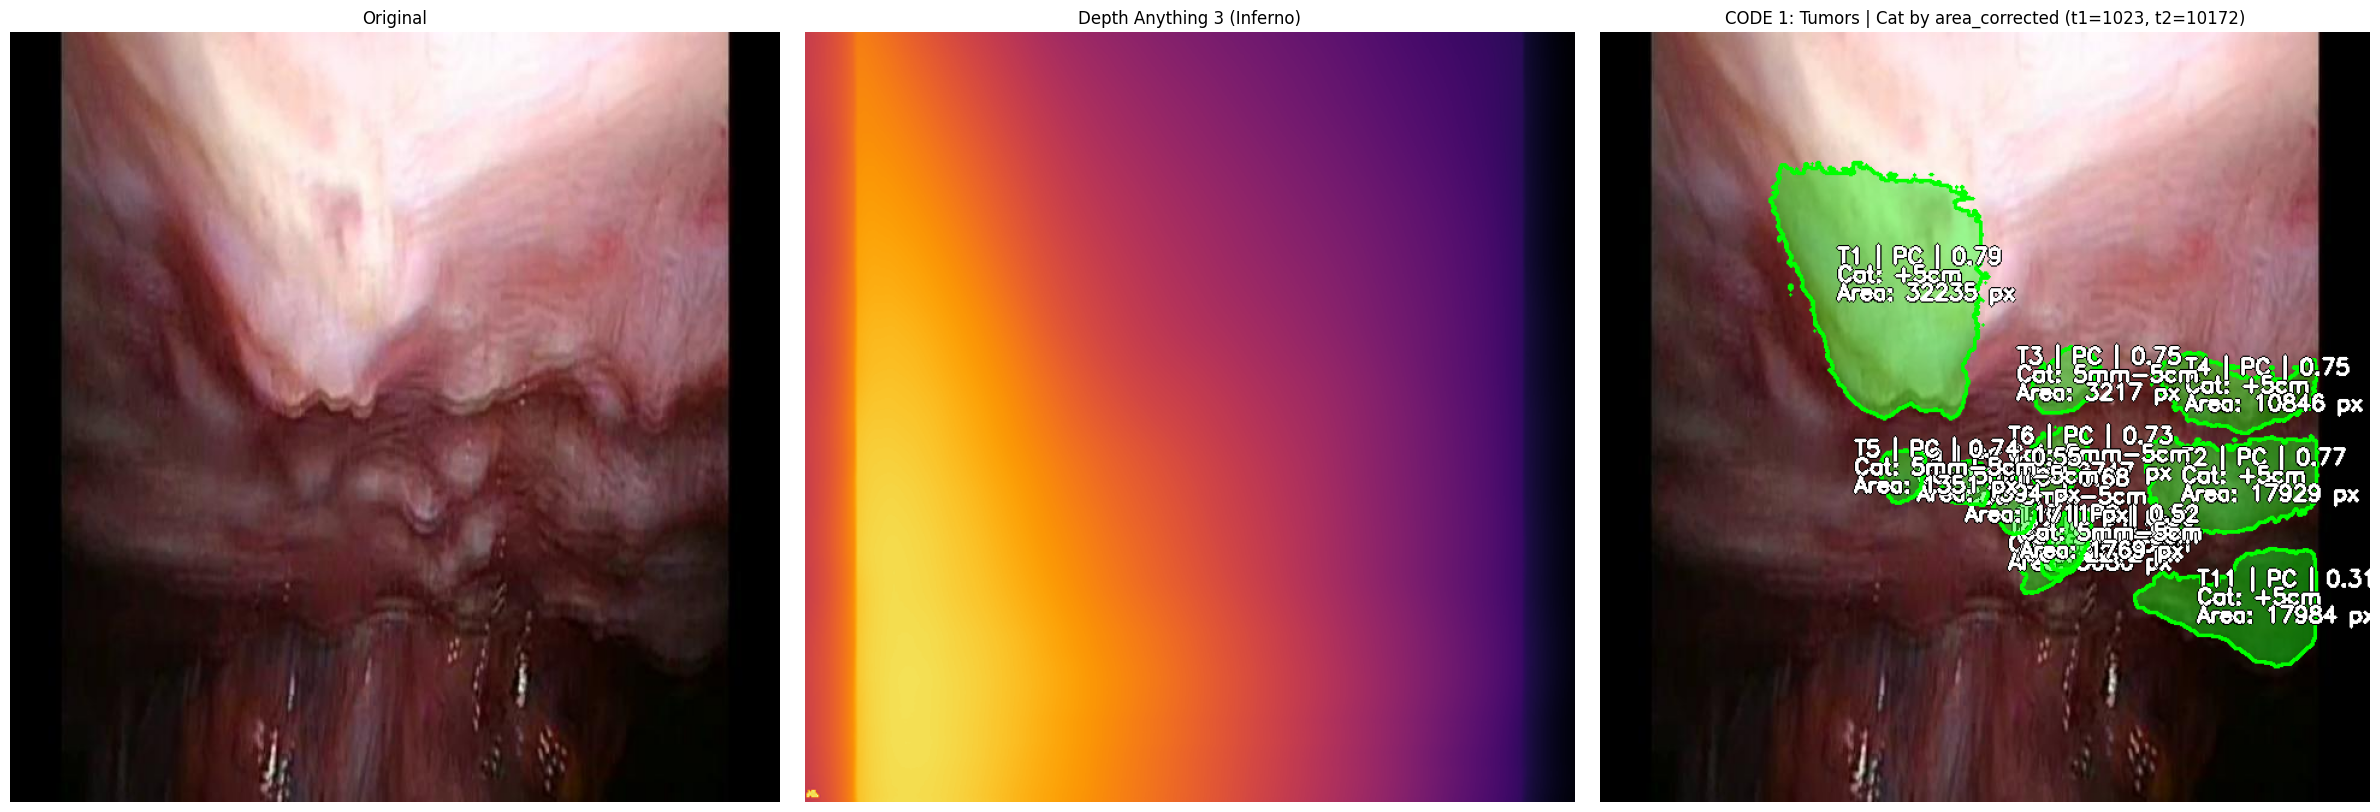


Sample 4 of 5: 00001184_jpg.rf.b359c1d279b2618828a40c41792fd0a5.jpg
[INFO ] Processed Images Done taking 0.013831377029418945 seconds. Shape:  torch.Size([1, 3, 504, 504])
[INFO ] Model Forward Pass Done. Time: 0.057573556900024414 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0012977123260498047 seconds
Meta: {'image': '00001184_jpg.rf.b359c1d279b2618828a40c41792fd0a5.jpg', 'num_det': 6, 'num_masks': 6, 'd_ref': 0.7463641166687012, 'dk_mode': 'median_raw', 'conf_thres': 0.25, 'iou_thres': 0.7, 'imgsz': 640, 'mask_thresh': 0.5}


image tumor_id  \
0  00001184_jpg.rf.b359c1d279b2618828a40c41792fd0...       T1   
1  00001184_jpg.rf.b359c1d279b2618828a40c41792fd0...       T2   
2  00001184_jpg.rf.b359c1d279b2618828a40c41792fd0...       T3   
3  00001184_jpg.rf.b359c1d279b2618828a40c41792fd0...       T4   
4  00001184_jpg.rf.b359c1d279b2618828a40c41792fd0...       T5   
5  00001184_jpg.rf.b359c1d279b2618828a40c41792fd0...       T6   

          tumor_uid  area_pixels  area_corrected  d_k_used     d_ref  \
0  d1638722f1da3f62         1153     1153.000000  0.746364  0.746364   
1  4465c9951676d0c3          423      429.766547  0.740465  0.746364   
2  f645be384c58487d          785      993.516775  0.663434  0.746364   
3  85045e8e5b1002dc         1446     4750.117433  0.411797  0.746364   
4  6ec9dec1a350edb8          977     3168.285110  0.414463  0.746364   
5  c5e22014daa1fcf1          733      973.880280  0.647515  0.746364   

      dk_mode  depth_mean  depth_median  centroid_x  centroid_y  \
0  median_raw    0.744720      0.746364  224.437988  174.083261   
1  median_raw    0.740838      0.740465  157.600473   20.687943   
2  median_raw    0.663812      0.663434  290.335032  232.271338   
3  median_raw    0.411579      0.411797  538.098202   93.224066   
4  median_raw    0.414518      0.414463  533.095189   94.530194   
5  median_raw    0.647801      0.647515  284.094134  172.219645   

                                      yolo_bbox_xyxy  yolo_conf  \
0  [204.588623046875, 148.73284912109375, 243.690...   0.642213   
1  [147.86801147460938, 5.329032897949219, 168.07...   0.445600   
2  [280.2655944824219, 213.4890594482422, 302.053...   0.387341   
3  [517.5621948242188, 65.90425109863281, 556.551...   0.377639   
4  [517.0877075195312, 66.56779479980469, 546.098...   0.368967   
5  [269.2784423828125, 152.85423278808594, 297.75...   0.296343   

   yolo_class_id yolo_class_name  \
0              0              PC   
1              0              PC   
2              0              PC   
3              0              PC   
4              0              PC   
5              0              PC   

                                       mask_polygons  \
0  [[[239, 147], [234, 148], [233, 152], [228, 15...   
1  [[[151, 1], [148, 3], [150, 21], [158, 35], [1...   
2  [[[288, 208], [287, 215], [278, 221], [280, 22...   
3  [[[556, 73], [551, 71], [538, 74], [531, 72], ...   
4  [[[531, 72], [524, 74], [520, 79], [520, 96], ...   
5  [[[281, 151], [271, 161], [272, 172], [283, 19...   

                                            mask_rle Size_Pred_Option1  
0  {'size': [640, 640], 'counts': [94316, 4, 634,...           5mm-5cm  
1  {'size': [640, 640], 'counts': [791, 1, 637, 5...             0-5mm  
2  {'size': [640, 640], 'counts': [133408, 4, 636...             0-5mm  
3  {'size': [640, 640], 'counts': [45991, 1, 619,...           5mm-5cm  
4  {'size': [640, 640], 'counts': [46611, 1, 635,...           5mm-5cm  
5  {'size': [640, 640], 'counts': [96921, 1, 639,...             0-5mm

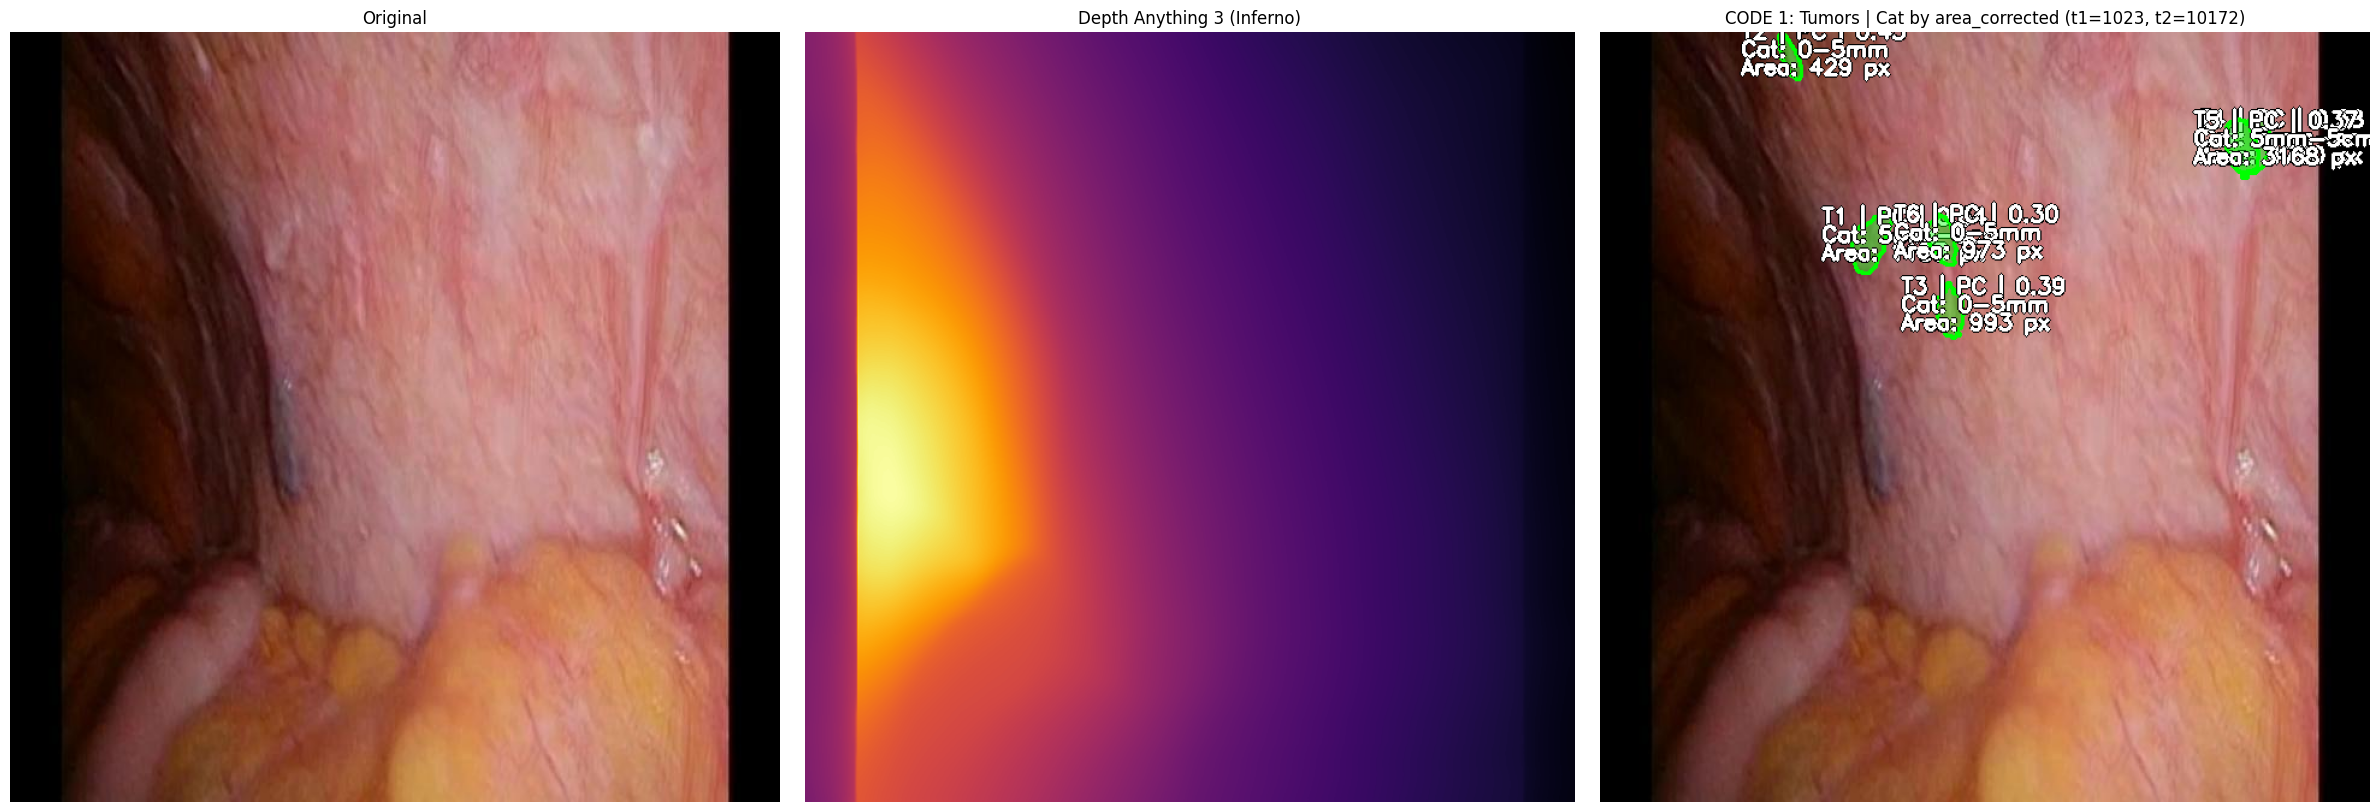


Sample 5 of 5: 00002458_jpg.rf.96c071f57003b241cc6cd01c106d85b8.jpg
[INFO ] Processed Images Done taking 0.011468887329101562 seconds. Shape:  torch.Size([1, 3, 504, 504])
[INFO ] Model Forward Pass Done. Time: 0.05869698524475098 seconds
[INFO ] Conversion to Prediction Done. Time: 0.0011713504791259766 seconds
Meta: {'image': '00002458_jpg.rf.96c071f57003b241cc6cd01c106d85b8.jpg', 'num_det': 6, 'num_masks': 6, 'd_ref': 0.840104877948761, 'dk_mode': 'median_raw', 'conf_thres': 0.25, 'iou_thres': 0.7, 'imgsz': 640, 'mask_thresh': 0.5}


image tumor_id  \
0  00002458_jpg.rf.96c071f57003b241cc6cd01c106d85...       T1   
1  00002458_jpg.rf.96c071f57003b241cc6cd01c106d85...       T2   
2  00002458_jpg.rf.96c071f57003b241cc6cd01c106d85...       T3   
3  00002458_jpg.rf.96c071f57003b241cc6cd01c106d85...       T4   
4  00002458_jpg.rf.96c071f57003b241cc6cd01c106d85...       T5   
5  00002458_jpg.rf.96c071f57003b241cc6cd01c106d85...       T6   

          tumor_uid  area_pixels  area_corrected  d_k_used     d_ref  \
0  d59361002d4fdf4f        22062    79066.927798  0.443771  0.840105   
1  b1fae16274fbd01b        11771    16347.754063  0.712871  0.840105   
2  c5a7f0db2d0225bc         3271     3670.353100  0.793085  0.840105   
3  e0bde9c8f8a126f3         4710     5188.600051  0.800422  0.840105   
4  b5b0c1af6ff6c30c         1494     1556.700824  0.823012  0.840105   
5  8297a7a119d2a458          321      321.000000  0.840105  0.840105   

      dk_mode  depth_mean  depth_median  centroid_x  centroid_y  \
0  median_raw    0.449640      0.443771  495.744674  442.587118   
1  median_raw    0.715485      0.712871  328.844618  249.298615   
2  median_raw    0.798144      0.793085  311.181290  446.607765   
3  median_raw    0.803020      0.800422  362.679193  544.586624   
4  median_raw    0.822935      0.823012  286.419009   26.860107   
5  median_raw    0.839879      0.840105  187.255452  633.074766   

                                      yolo_bbox_xyxy  yolo_conf  \
0  [430.8636474609375, 299.25732421875, 549.69415...   0.859436   
1  [284.8978271484375, 156.92312622070312, 373.33...   0.820919   
2  [289.043212890625, 397.49853515625, 340.707397...   0.784393   
3  [336.25592041015625, 489.59613037109375, 397.9...   0.777372   
4  [270.8162841796875, 4.865230560302734, 305.027...   0.495025   
5  [173.9833221435547, 623.5130004882812, 204.618...   0.283792   

   yolo_class_id yolo_class_name  \
0              0              PC   
1              0              PC   
2              0              PC   
3              0              PC   
4              0              PC   
5              0              PC   

                                       mask_polygons  \
0  [[[446, 555], [445, 566], [449, 573], [454, 56...   
1  [[[351, 162], [349, 168], [315, 168], [339, 16...   
2  [[[331, 410], [328, 413], [331, 419], [334, 41...   
3  [[[352, 485], [348, 488], [338, 508], [339, 51...   
4  [[[280, 0], [278, 7], [275, 6], [271, 10], [26...   
5  [[[175, 634], [175, 639], [201, 639], [198, 63...   

                                            mask_rle Size_Pred_Option1  
0  {'size': [640, 640], 'counts': [196331, 1, 637...              +5cm  
1  {'size': [640, 640], 'counts': [101471, 3, 637...              +5cm  
2  {'size': [640, 640], 'counts': [254392, 3, 633...           5mm-5cm  
3  {'size': [640, 640], 'counts': [310752, 7, 631...           5mm-5cm  
4  {'size': [640, 640], 'counts': [280, 7, 633, 7...           5mm-5cm  
5  {'size': [640, 640], 'counts': [400181, 9, 630...             0-5mm

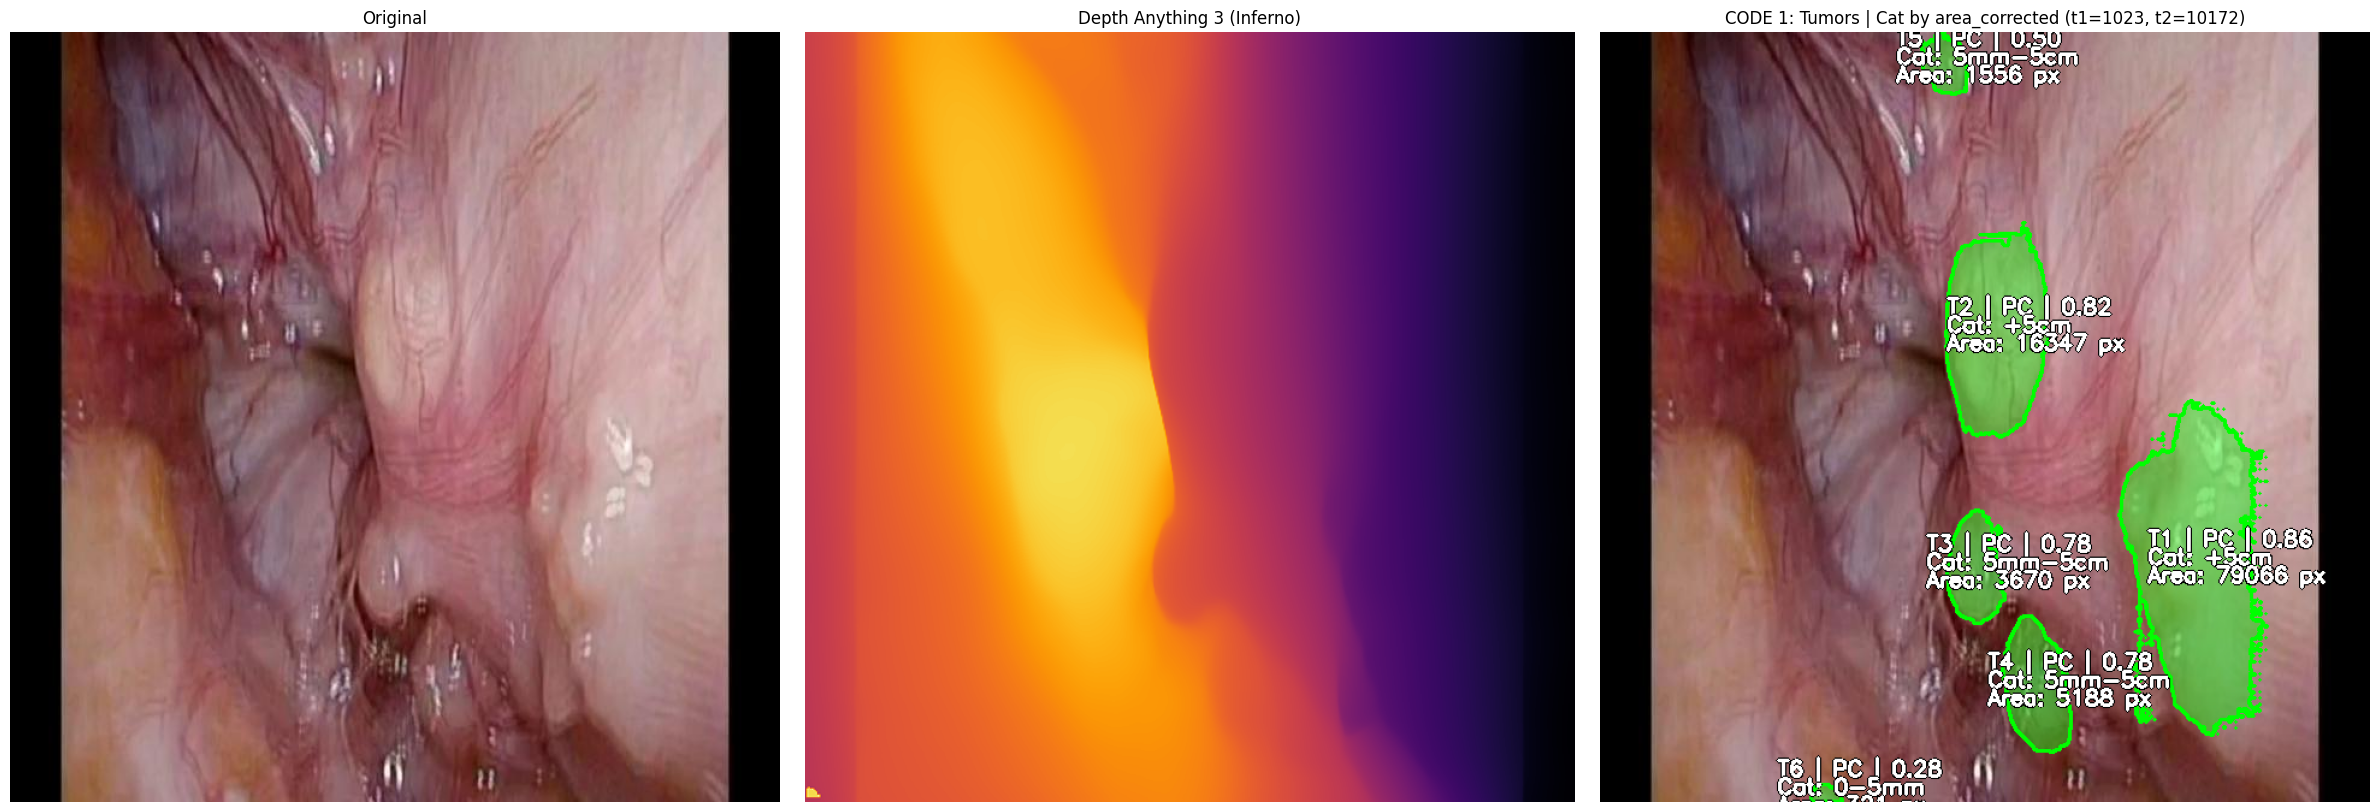

In [70]:
visualize_multiple_samples(
    n_samples=5,
    images_dir=TEST_IMAGES_PATH
)